In [1]:
# Napravit ćemo simulaciju ovjesa auta prema modelu s 1. predavanja.
# U ovoj varijanti rješenja "importamo" funkcije iz svih modula na preporučeni način, svaki modul u svoj namespace.
import matplotlib.pyplot as plt;
import numpy as np;
import control.matlab as con;
import math;

# Uz donju liniju će modul control generirati upozorenja ako pokušamo koristiti numpy.matrix umjesto numpy.array.
con.use_numpy_matrix(flag=False, warn=True); 

In [2]:
# Fizikalne veličine.
m1 = 2500;   # Masa tijela auta, u kg.
m2 = 320;    # Masa ovjesa, u kg.
k1 = 3000;   # Prva opruga, u N/m.
c1 = 1000;   # Prigušivač, u Ns/m.
k2 = 10000;  # Druga opruga, u N/m.

In [3]:
# Definicija LTI sustava.
A = np.array( [
    [0, 1, 0, 0],
    [-k1/m1, -c1/m1, k1/m1, c1/m1],
    [0, 0, 0, 1],
    [k1/m2, c1/m2, (-k1-k2)/m2, -c1/m2] ] );
B = np.array( [
    [0],
    [0],
    [0],
    [k2/m2] ] );
C = np.array( [
    [1, 0, 0, 0],
    [0, 0, 1, 0] ] );
D = np.array( [
    [0],
    [0] ] );

# Definiramo LTI pomoću funkcije ss iz modula control.
G = con.ss( A, B, C, D );

# Možemo pristupiti matricama iz LTI sustava G.
print( G.A );

# "Lijepi" ispis svih matrica iz LTI sustava G.
display( G );

[[  0.      1.      0.      0.   ]
 [ -1.2    -0.4     1.2     0.4  ]
 [  0.      0.      0.      1.   ]
 [  9.375   3.125 -40.625  -3.125]]


<LinearIOSystem:sys[2]:['u[0]']->['y[0]', 'y[1]']>

In [4]:
# Simulacija pomoću funkcije lsim iz modula control.

# Vremenski interval i input;
t = np.linspace( 0, 60, 600 );

# Input.
def uu( t ):
    if( t < 10 or t > 20 ):
        return 0;
    else:
        return 2*math.sin( (t-10)/10*math.pi );

# Primijenimo funkciju uu na svaki element polja t i rezultat spremimo u polje u.
u = np.array( list( map( uu, t ) ) );

# Početno stanje.
x0 = np.array( [0, 0, 0, 0] );

# Simulacija: yout = izlaz, tout = vremena, xout = stanja.
[yout, tout, xout] = con.lsim( G, u, t, x0 );

# Za svaki od 600 vremenskih koraka smo dobili po 2 izlaza (jer sustav G ima 2 izlaza, tj. matrica C ima 2 retka).
print( yout.shape )

(600, 2)


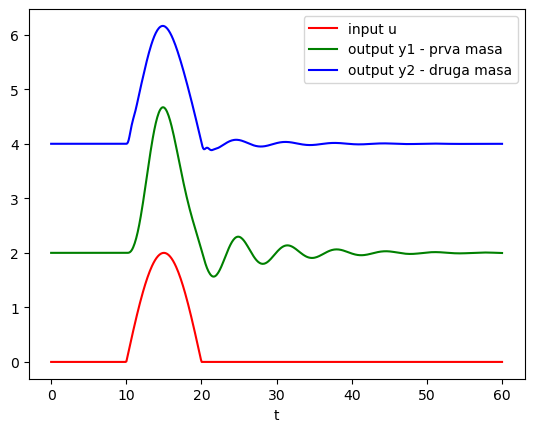

In [5]:
# Donja linija omogućava crtanje grafova, ali bez alata za kretanje po nacrtanoj slici.
%matplotlib inline 

# Donja linija omogućava crtanje grafova, te daje alate za kretanje po nacrtanoj slici. (Zahtijeva python paket ipympl.)
# %matplotlib widget 

# Crtamo input vs output.
f = plt.figure;
plt.plot( t, u, 'r-', label='input u' );
plt.plot( tout, yout[:, 0] + 2, 'g-', label='output y1 - prva masa' );
plt.plot( tout, yout[:, 1] + 4, 'b-', label='output y2 - druga masa' );
plt.xlabel( 't' );
plt.legend();
plt.show();

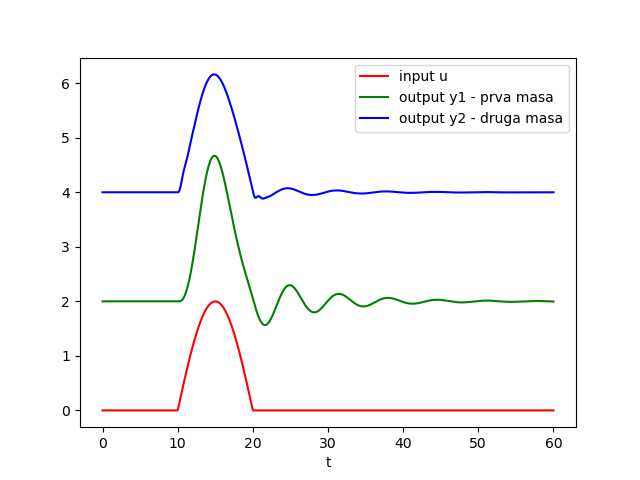

In [6]:
# Donja linija omogućava crtanje grafova, ali bez alata za kretanje po nacrtanoj slici.
# %matplotlib inline 

# Donja linija omogućava crtanje grafova, te daje alate za kretanje po nacrtanoj slici. (Zahtijeva python paket ipympl.)
%matplotlib widget 

# Simulaciju možemo naravno napraviti i pomoću funkcije odeint iz paketa scipy.
from scipy.integrate import odeint;

def f( x, t ):
    u = np.array( [uu(t)] );  # Zapakiramo u u vektor (tj. 1d-array).
    ff = A @ x + B @ u;       # ff = matrica @ vektor + matrica @ vektor = vektor

    return ff;

# odeint zahtjeva baš vektor, a ne Nx1 matricu kao početni uvjet...
x0 = np.array( [0, 0, 0, 0] );
x = odeint( f, x0, t ); # x je 600x4 matrica (reci=vremenski trenuci, stupci=stanja).

u_all = np.array( list( map( uu, t ) ) ).reshape( [1, -1] ); # u_all je 1x600 matrica (bez reshape je vektor).
y = C @ x.T + D @ u_all; # Treba transponirati x da bi se mogao množiti sa C. Output y je 2x600 matrica.

f = plt.figure;
plt.plot( t, u, 'r-', label='input u' );
plt.plot( t, y[0, :].T + 2, 'g-', label='output y1 - prva masa' );
plt.plot( t, y[1, :].T + 4, 'b-', label='output y2 - druga masa' );
plt.xlabel( 't' );
plt.legend();
plt.show();